<a href="https://colab.research.google.com/github/curomame/Engineer-Big-Data-Analysis-practical-examination/blob/master/DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1유형

# 새 섹션

#1 유형

###데이터 프레임
행, 열로 table 구성

###학습 내용

1. 데이터 타입
2. 기초 통계량
3. 데이터 인덱싱, 필터링, 정렬, 변경
4. 중복값, 결측치, 이상치 처리(제거, 대체)
5. 데이터 Scaling (데이터 표준화(z), 데이터 정규화(min-max))
6. 데이터 합치기
7. 날짜/시간 데이터, index 다루기

###기출 트렌드

날짜 데이터
파생변수 데이터
시간 데이터

###결론

1. 문제 잘 읽기(조건 많음)
2. 날짜와 시간 데이터 꼭 연습

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
## 문제 1

import seaborn as sns
import pandas as pd
sns.get_dataset_names()
df = sns.load_dataset('car_crashes')

In [ ]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
data = df.sort_values(by=df.columns[2],ascending=False)
tenth_num = data.iloc[9,2]
data.iloc[:10,2] = tenth_num
result = data[(data['speeding']>=7)]
print(result['alcohol'].mean())

5.600099999999999


문제 2

In [ ]:
import numpy as np
df = sns.load_dataset('planets')

df.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
length = int(len(df)*0.7)
df = df[:length]
df2 = df.copy()
df2['distance'] = df2['distance'].fillna(df2['distance'].median())

print(np.std(df['distance']))
print(np.std(df2['distance']))

275.0161144074896
267.0513844259766


## 작업유형 2

In [ ]:
import seaborn as sns
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
#1. 결측치 제거

missing = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
for i in missing:
  df[i] = df[i].fillna(df[i].median())
df['sex'] = df['sex'].fillna('Male')

In [ ]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
#라벨 인코딩

from sklearn.preprocessing import LabelEncoder
label = ['species','island','sex']

df[label] = df[label].apply(LabelEncoder().fit_transform)

In [ ]:
# 데이터 타입 변환 및 더미 처리

In [ ]:
import pandas as pd
category = ['island','sex']

for i in category:
  df[i] = df[i].astype('category')
pd.get_dummies(df)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_0,island_1,island_2,sex_0,sex_1
0,0,39.10,18.7,181.0,3750.0,0,0,1,0,1
1,0,39.50,17.4,186.0,3800.0,0,0,1,1,0
2,0,40.30,18.0,195.0,3250.0,0,0,1,1,0
3,0,44.45,17.3,197.0,4050.0,0,0,1,0,1
4,0,36.70,19.3,193.0,3450.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
339,2,44.45,17.3,197.0,4050.0,1,0,0,0,1
340,2,46.80,14.3,215.0,4850.0,1,0,0,1,0
341,2,50.40,15.7,222.0,5750.0,1,0,0,0,1
342,2,45.20,14.8,212.0,5200.0,1,0,0,1,0


In [ ]:
# 파생 변수 만들기
# 파생 변수 : 데이터가 풍부하고 활용할 여지가 많으면 성능이 좋아지는데, 그걸 위해 새로운 파생 변수를 만드는 것

In [ ]:
df['body_mass_g_qcut'] = pd.qcut(df['body_mass_g'],5,labels=False)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_g_qcut
0,0,2,39.10,18.7,181.0,3750.0,1,1
1,0,2,39.50,17.4,186.0,3800.0,0,1
2,0,2,40.30,18.0,195.0,3250.0,0,0
3,0,2,44.45,17.3,197.0,4050.0,1,2
4,0,2,36.70,19.3,193.0,3450.0,0,0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['bill_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['bill_depth_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['flipper_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['body_mass_g'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['bill_length_mm', 'bill_depth_mm'], ['bill_depth_mm', 'flipper_length_mm'], ['flipper_length_mm', 'body_mass_g'], ['body_mass_g', 'body_mass_g_qcut']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['species', 'bill_length_mm', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['species', 'bill_depth_mm', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['species', 'flipper_length_mm', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['species', 'body_mass_g', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['bill_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['bill_depth_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['flipper_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['body_mass_g'], **{})
chart

In [ ]:
df['body_mass_g_qcut'].value_counts()

0    71
1    70
2    68
4    68
3    67
Name: body_mass_g_qcut, dtype: int64

In [ ]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
min = MinMaxScaler()
min.fit(df[scaler])
df[scaler] = min.transform(df[scaler])

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_g_qcut
0,0,2,0.254545,0.666667,0.152542,0.291667,1,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0,1
2,0,2,0.298182,0.583333,0.389831,0.152778,0,0
3,0,2,0.449091,0.500000,0.423729,0.375000,1,2
4,0,2,0.167273,0.738095,0.355932,0.208333,0,0


In [ ]:
# 데이터 분리

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:], df['species'], test_size=0.2, stratify=df['species'], random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(275, 7)
(69, 7)
(275,)
(69,)


In [ ]:
# 모형 학습
# 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)

pred1 = model1.predict(x_test)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model2 = AdaBoostClassifier()
model2.fit(x_train,y_train)

pred2 = model2.predict(x_test)

In [ ]:
# 두개의 모형을 투표해서 새로운 모형을 만드는 보팅

from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('rf',model1),('ad',model2)], voting='hard')
clf.fit(x_train,y_train)
pred3 = clf.predict(x_test)

In [ ]:
pred3

array([0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0,
       2, 0, 1])

In [ ]:
# 모형 평가

from sklearn.metrics import accuracy_score

print('랜포',accuracy_score(y_test,pred1))
print('ad',accuracy_score(y_test,pred2))
print('합',accuracy_score(y_test,pred3))

랜포 1.0
ad 0.9565217391304348
합 1.0


In [ ]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[50,100],'max_depth':[4,6]}
model4 = RandomForestClassifier()
clf = GridSearchCV(estimator = model4, param_grid=parameters, cv=3)
clf.fit(x_train,y_train)

print('최적의 파라미터',clf.best_params_)

최적의 파라미터 {'max_depth': 6, 'n_estimators': 50}


In [ ]:
#예측값 저장

pd.DataFrame({'id':y_test.index,'pred':pred3}).to_csv('00300.csv',index=False)

In [ ]:
check = pd.read_csv('00300.csv')
check.head()

,id,pred
0,57,0
1,173,1
2,213,1
3,50,0
4,25,0


# 새 섹션

In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/dataq/main/mtcars.csv")
df.rename(columns={"Unnamed: 0":"car"},inplace=True)
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
df.dtypes

car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [13]:
df1 = df.copy()
df1 = df1.astype({'cyl':'object'})

df1 = df1.astype({'cyl':'int','gear':'object'})

#print(df.dtypes)

car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


In [14]:
df1['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [16]:
#2. 기초 통계량 (평균, 중앙값, IQR, 표준편차 등)

df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [17]:
df.shape #행, 열 순

(32, 12)

In [19]:
mpg_mean = df['mpg'].mean()
print(mpg_mean)

20.090625000000003


In [20]:
mpg_median = df['mpg'].median()
print(mpg_median)

19.2


In [21]:
mpg_mode = df['cyl'].mode()
print(mpg_mode)

0    8
Name: cyl, dtype: int64


In [22]:
print(mpg_mode[0])

8


In [23]:
df['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [24]:
mpg_var = df['mpg'].var()
print(mpg_var)

36.32410282258064


In [25]:
mpg_std = df['mpg'].std()
print(mpg_std)

6.026948052089104


In [26]:
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)
IQR = Q3-Q1
print(Q1,Q3,IQR)

15.425 22.8 7.375


In [28]:
#범위
mpg_max = df['mpg'].max()
mpg_min = df['mpg'].min()

mpg_range = (mpg_max - mpg_min)



In [29]:
#분포의 비대칭 정도

mpg_skew = df['mpg'].skew()
mpg_kurt = df['mpg'].kurt()

In [30]:
dfmpg = df['mpg']

In [31]:
mpg_sum = dfmpg.sum()

In [32]:
IQR2 = Q1-Q3
print(abs(IQR2))

7.375


In [33]:
len(dfmpg)

32

In [34]:
#그룹화 해서 계산하기

In [35]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [40]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [41]:
#데이터 인덱싱 필터링 정렬 변경
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/dataq/main/mtcars.csv")
df.rename(columns={"Unnamed: 0":"car"},inplace=True)
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [42]:
df.loc[3,'mpg']

21.4

In [43]:
df.loc[:,['mpg','cyl']]

,mpg,cyl
0,21.0,6
1,21.0,6
2,22.8,4
3,21.4,6
4,18.7,8
5,18.1,6
6,14.3,8
7,24.4,4
8,22.8,4
9,19.2,6


In [44]:
df.head(4)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1


In [45]:
df.tail()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [ ]:
#열 추가 제거

df_cyl = df['cyl']

In [46]:
df_new = df[['cyl','mpg']]
df_new.head()

,cyl,mpg
0,6,21.0
1,6,21.0
2,4,22.8
3,6,21.4
4,8,18.7


In [49]:
df.drop(columns = ['car','cyl','mpg'])

,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,160.0,110,3.90,2.620,16.46,0,1,4,4
1,160.0,110,3.90,2.875,17.02,0,1,4,4
2,108.0,93,3.85,2.320,18.61,1,1,4,1
3,258.0,110,3.08,3.215,19.44,1,0,3,1
4,360.0,175,3.15,3.440,17.02,0,0,3,2
5,225.0,105,2.76,3.460,20.22,1,0,3,1
6,360.0,245,3.21,3.570,15.84,0,0,3,4
7,146.7,62,3.69,3.190,20.00,1,0,4,2
8,140.8,95,3.92,3.150,22.90,1,0,4,2
9,167.6,123,3.92,3.440,18.30,1,0,4,4


In [50]:
df2 = df.copy()
df['new'] = df['mpg']+10
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,31.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,31.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,32.8
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,31.4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,28.7


In [51]:
#데이터 필터링

#조건을 주고 가지고 오세요

#cyl = 4 인 수

cond1 = (df['cyl'] == 4)
len(df[cond1])

11

In [52]:
cond2 = (df['mpg'] >= 22)
print(len(df[cond2]))

9


In [54]:
#2개 조건 필터링

df[cond1&cond2]

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,32.8
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,34.4
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,32.8
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,42.4
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,40.4
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,43.9
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,37.3
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2,36.0
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,40.4


In [55]:
print(df[cond1|cond2])

               car   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
2       Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
7        Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
8         Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
17        Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1     4   
18     Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1     4   
19  Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1     4   
20   Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0     3   
25       Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1     4   
26   Porsche 914-2  26.0    4  120.3   91  4.43  2.140  16.70   0   1     5   
27    Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.90   1   1     5   
31      Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.60   1   1     4   

    carb   new  
2      1  32.8  
7      2  34.4  


In [56]:
# 데이터 정렬

df.sort_values('mpg',ascending=False).head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,43.9
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,42.4
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,40.4
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,40.4
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,37.3


In [61]:
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/dataq/main/mtcars.csv")
df.rename(columns={"Unnamed: 0":"car"},inplace=True)
df.head()

# hp 변수가 205가 넘는 값은 205로 처리하고, 나머지는 그대로 유지
df['hp'] = np.where(df['hp'] >= 205, 205, df['hp'])
# if a else b 와 같음

df.sort_values('hp',ascending=False).head(20)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
16,Chrysler Imperial,14.7,8,440.0,205,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,205,3.54,3.570,14.60,0,1,5,8
28,Ford Pantera L,15.8,8,351.0,205,4.22,3.170,14.50,0,1,5,4
6,Duster 360,14.3,8,360.0,205,3.21,3.570,15.84,0,0,3,4
23,Camaro Z28,13.3,8,350.0,205,3.73,3.840,15.41,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,205,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


In [62]:
#결측치, 이상치, 중복값 처리(제거 or 대체)

In [63]:
import seaborn as sns

df = sns.load_dataset('titanic')

In [65]:
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [66]:
df.shape

(891, 15)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [69]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [71]:
df.dropna(axis=0).shape #행 기준
df.dropna(axis=1).shape #열 기준

(891, 11)

In [74]:
df2 = df.copy()
df2 = pd.DataFrame(df)

In [75]:
# 1. 중앙값이나 평균값 등으로 대체

median_age = df2['age'].median()
print(median_age)

28.0


In [76]:
df2['age'] = df['age'].fillna(median_age)

In [78]:
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [79]:
print(df['age'].mean())
print(df2['age'].mean())

29.69911764705882
29.36158249158249


In [80]:
# 이상치 확인 및 처리
# 상자그림 활용

<Axes: >

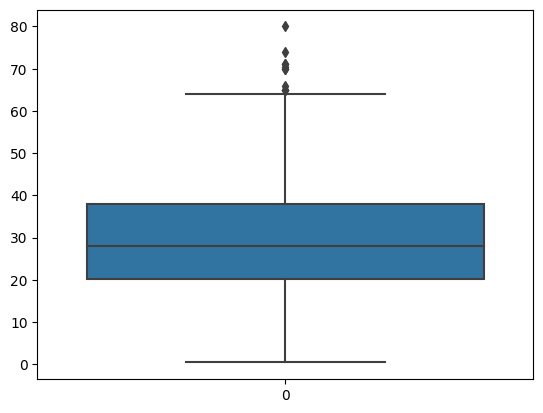

In [81]:
df = sns.load_dataset('titanic')
sns.boxplot(df['age'])

In [82]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1

In [83]:
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print(upper,lower)

64.8125 -6.6875


In [85]:
# 문제 : age 변수의 이상치를 제외한 데이터의 수는? (상자 그림 기준)

cond1 = (df['age'] <= upper)
cond2 = (df['age'] >= lower)

print(len(df[cond1 & cond2]))
print(len(df[cond1]))
print(len(df))

703
703
891


In [86]:
print(df['age'].min())

0.42


In [88]:
df_new = df[cond1&cond2]
df_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [91]:
# 표준 정규 분포 활용( 이상치 플마 3Z를 넘어가는 값)
# 데이터 표준화, Z = (개별값 - 평균) / 표준편차

In [92]:
mean_age = df['age'].mean()
std_age = df['age'].std()
print(mean_age)
print(std_age)

29.69911764705882
14.526497332334042


In [93]:
znorm = (df['age'] - mean_age) / std_age
znorm

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64

In [94]:
# 문제 : 이상치의 개수는?

cond1 = (znorm > 3)
len(df[cond1])

cond2 = (znorm < -3)
len(df[cond2])

print(len(df[cond1]) + len(df[cond2]))

2


In [95]:
# 중복값 제거하기
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [96]:
df1 = df.copy()
df1 = df.drop_duplicates()
print(df1.shape)

(784, 15)


In [97]:
#5. 데이터 scaling(데이터 표준화, 정규화)

# 1) 데이터 표준화(Z-score normaliztion)

In [98]:
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/dataq/main/mtcars.csv")
df.rename(columns={"Unnamed: 0":"car"},inplace=True)
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [100]:
from sklearn.preprocessing import StandardScaler

zscaler = StandardScaler() #변수명 사용 편하게 변경

df['mpg'] = zscaler.fit_transform(df[['mpg']])
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.153299,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.153299,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.456737,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.220730,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,-0.234427,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [101]:
print(df['mpg'].mean(), df['mpg'].std())

-4.996003610813204e-16 1.016001016001524


In [102]:
#2) 데이터 정규화 min max normaliztion

df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/dataq/main/mtcars.csv")
df.rename(columns={"Unnamed: 0":"car"},inplace=True)
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [103]:
from sklearn.preprocessing import MinMaxScaler
mscaler = MinMaxScaler()

In [104]:
df['mpg'] = mscaler.fit_transform(df[['mpg']])
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.451064,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.451064,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.527660,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.468085,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,0.353191,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [106]:
print(df['mpg'].min(), df['mpg'].max())

0.0 1.0


In [107]:
# 데이터 합치기

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [110]:
df1 = df.loc[0:30]
df2 = df.loc[31:60]

In [111]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [112]:
df_sum = pd.concat([df1,df2], axis=0) #행 방향으로 결합 (위, 아래))


In [114]:
df3 = df.loc[:,'sepal_length':'petal_length']
df4 = df.loc[:,['petal_width','species']]

In [115]:
df_sum2 = pd.concat([df3,df4],axis=1)
df_sum.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 7. 날짜/시간 데이터, index 다루기

### 1) 날짜 다루기